## Explore the COVID  Deaths Data 

### [Quick intro to the project, feel free to keep it short]

In [1]:
# Not-exhaustive project checklist
# Note: this is not a writing assignment, but you should still incorporate comments or headers throughout
# -- This will help others who review your work, but will also help you keep track of what you're doing
# -- Just think about what would help you understand a peer's project when you have to grade theirs later


# 1) Dataset included
# 1a) Dataset explained/documented when used
# 2) Analysis performed
# 2a) Analysis steps documented, explained briefly
# 3) Visualizations/outputs
# 4) Conclusion
# ---Did you answer your questions?
# ---Did you find anything else?
# ---What problems did you run into?
# ---Any suggestions for future research?

# Critical checks before submission
# - Does the noteboook run without error? (Kernel>restart & run all => no errors at all? No long periods of processing?)
# - Do you have your dataset included here? You shouldn't be connecting to any external data
# - - Even if external datasets work here, they WILL NOT work for peer-grading, and you may get a 0.

# Introduction:

This notebook uses the death data information regarding COVID-19 death counts categorized by age and sex in the United States. We will explore the Covid deaths here through various analysis techniques to understand how age correlates with mortality rates during the pandemic and i have used various visualization to explore the data , slicing the data against age groups and others.

Key Insights: The data highlights how significantly COVID-19 affected older adults, with individuals aged 65 and over experiencing the most severe outcomes, including higher hospitalization and mortality rates."



# Dataset Description: 

Dataset obtained from Kaggle and has Covid provisional death data by Sex and Age in years
https://www.kaggle.com/code/lindleylawrence/ages-of-death-covid-19


# Import packages and explore the data

In [2]:
import sys
print(sys.version) 

# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
print(sys.version) 

# Read the data and create covid deaths dataframe
Deaths_df = pd.read_csv('Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')

#Display rows and columns of the file
print("=== Covid Death data set: {} rows x {} columns. ===".format(Deaths_df.shape[0], Deaths_df.shape[1]))
display (Deaths_df.head())

#Print the column datatype and information related to columns
Deaths_df.info()

#Describe the Data
Deaths_df.describe()



3.8.7 (default, Jan 25 2021, 11:14:52) 
[GCC 5.5.0 20171010]
3.8.7 (default, Jan 25 2021, 11:14:52) 
[GCC 5.5.0 20171010]
=== Covid Death data set: 137700 rows x 16 columns. ===


,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,All Ages,1146774.0,12303399.0,1162844.0,569264.0,22229.0,1760095.0,NaN
1,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,Under 1 year,519.0,73213.0,1056.0,95.0,64.0,1541.0,NaN
2,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,0-17 years,1696.0,130970.0,2961.0,424.0,509.0,4716.0,NaN
3,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,1-4 years,285.0,14299.0,692.0,66.0,177.0,1079.0,NaN
4,09/27/2023,01/01/2020,09/23/2023,By Total,NaN,NaN,United States,All Sexes,5-14 years,509.0,22008.0,818.0,143.0,219.0,1390.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137700 entries, 0 to 137699
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Data As Of                                137700 non-null  object 
 1   Start Date                                137700 non-null  object 
 2   End Date                                  137700 non-null  object 
 3   Group                                     137700 non-null  object 
 4   Year                                      134946 non-null  float64
 5   Month                                     123930 non-null  float64
 6   State                                     137700 non-null  object 
 7   Sex                                       137700 non-null  object 
 8   Age Group                                 137700 non-null  object 
 9   COVID-19 Deaths                           98270 non-null   float64
 10  Total Deaths        

,Year,Month,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
count,134946.000000,123930.000000,9.827000e+04,1.181910e+05,9.283600e+04,100816.000000,111012.000000,9.346700e+04
mean,2021.408163,6.200000,3.135865e+02,2.841953e+03,3.365971e+02,152.513411,5.002468,5.054918e+02
std,1.086439,3.350635,5.992341e+03,5.620138e+04,6.126574e+03,2980.886938,110.606691,9.256952e+03
min,2020.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,2020.000000,3.000000,0.000000e+00,4.300000e+01,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,2021.000000,6.000000,0.000000e+00,1.530000e+02,1.800000e+01,0.000000,0.000000,2.500000e+01
75%,2022.000000,9.000000,5.000000e+01,6.570000e+02,7.400000e+01,21.000000,0.000000,1.070000e+02
max,2023.000000,12.000000,1.146774e+06,1.230340e+07,1.162844e+06,569264.000000,22229.000000,1.760095e+06


# Check Missing Values

In [3]:
# Let's check for missing values:
Deaths_df.isnull().sum() #https://www.kaggle.com/code/lindleylawrence/ages-of-death-covid-19

Data As Of                                      0
Start Date                                      0
End Date                                        0
Group                                           0
Year                                         2754
Month                                       13770
State                                           0
Sex                                             0
Age Group                                       0
COVID-19 Deaths                             39430
Total Deaths                                19509
Pneumonia Deaths                            44864
Pneumonia and COVID-19 Deaths               36884
Influenza Deaths                            26688
Pneumonia, Influenza, or COVID-19 Deaths    44233
Footnote                                    39804
dtype: int64

In [4]:
unique_values = Deaths_df[Deaths_df['State'] == 'United States']['Group'].unique()
print(unique_values)

# Filter the DataFrame
Monthly_cases = Deaths_df[(Deaths_df['State'] == 'United States') & (Deaths_df['Group'] == 'By Month')]

# Sum the 'Cases' column
#Monthly_cases = filtered_df['COVid-19 Deaths'].sum()
Monthly_cases.head()
# daily_cases.index = pd.to_datetime(daily_cases.index)
# daily_cases.head()

['By Total' 'By Year' 'By Month']


,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
13770,09/27/2023,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,All Sexes,All Ages,6.0,264677.0,17909.0,3.0,2125.0,20037.0,NaN
13771,09/27/2023,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,All Sexes,Under 1 year,0.0,1784.0,41.0,0.0,8.0,49.0,NaN
13772,09/27/2023,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,All Sexes,0-17 years,0.0,2966.0,90.0,0.0,63.0,153.0,NaN
13773,09/27/2023,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,All Sexes,1-4 years,0.0,315.0,22.0,0.0,18.0,40.0,NaN
13774,09/27/2023,01/01/2020,01/31/2020,By Month,2020.0,1.0,United States,All Sexes,5-14 years,0.0,471.0,21.0,0.0,29.0,50.0,NaN


In [11]:
# Step 1: Set the datetime index
Monthly_cases.set_index('Start Date', inplace=True)

# Step 2: Calculate number of days in each month
Monthly_cases['days_in_month'] = Monthly_cases.index.days_in_month

# Step 3: Calculate daily average
Monthly_cases['daily_cases'] = Monthly_cases['Cases'] / Monthly_cases['days_in_month']

# Step 4: Create a date range for each month and assign daily values
daily_data = (
    Monthly_cases
    .apply(lambda row: pd.Series(
        [row['daily_cases']] * row['days_in_month'],
        index=pd.date_range(start=row.name, periods=row['days_in_month'], freq='D')
    ), axis=1)
    .stack()
    .to_frame(name='Daily Cases')
)

# Optional: Reset index if needed
daily_data.index.names = ['Start Date', None]
daily_data = daily_data.reset_index(level=1, drop=True)

KeyError: "None of ['Start Date'] are in the columns"

# Clean the data

In [ ]:
#Make copy of the dataframe
Deaths_df=Deaths_df.copy()

# Populate the year and month columns from the Start Date column in the Total

#Convert to datetime and clean the data
Deaths_df["Start Date"] = pd.to_datetime(Deaths_df["Start Date"])

# Extract year and month from Start Date column
Deaths_df["Year"] = Deaths_df["Start Date" ].dt.year
Deaths_df["Month"] = Deaths_df["Start Date"].dt.month
Deaths_df


# Explore the data where the State column is United States information

In [ ]:

# Explore the data where the column is not All States information
Deaths_df[Deaths_df['State'] == 'United States']

# Categorical Analysis and Visualization

In [ ]:
#Analyze the United States data by Age Group

#Pie Chart visualization
Deaths_df['Age Group'].value_counts().plot(kind='pie', figsize=(6,6))

# Barchart Analysis 

In [ ]:
#Analyze the Total Deaths by Age Group >= 55-64 years and Sex is Male

# Filter rows where State is California, Age group is 55-64 years , Sex is Male and Total Deaths is greater than 100,000
Deaths_filtered = Deaths_df[(Deaths_df['State']=='California') & (Deaths_df['Age Group'] >= '55-64 years') & (Deaths_df['Sex'] == 'Male')
                           & (Deaths_df['Total Deaths'] >= 100000) ]

Deaths_filtered

Deaths_filtered['Total Deaths'].value_counts().plot(kind='bar', figsize=(14,6))                         


# BarChart Analysis

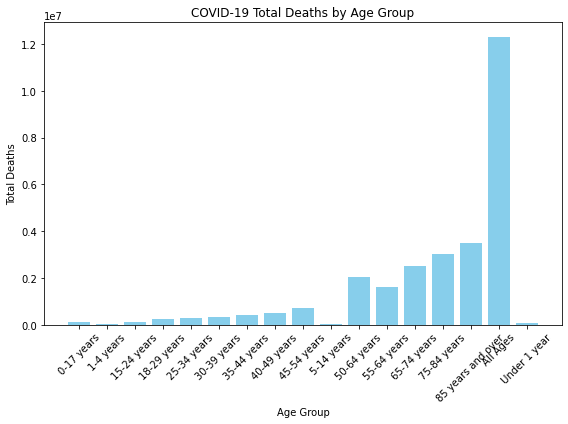

In [12]:
# Explore the data

import matplotlib.pyplot as plt

Deaths_df.sort_values('Age Group', inplace=True)  # Ensure age groups are ordered logically
plt.figure(figsize=(8,6))
plt.bar(Deaths_df['Age Group'], Deaths_df['Total Deaths'], color='skyblue')
plt.title('COVID-19 Total Deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# Scatter Plot Analysis 

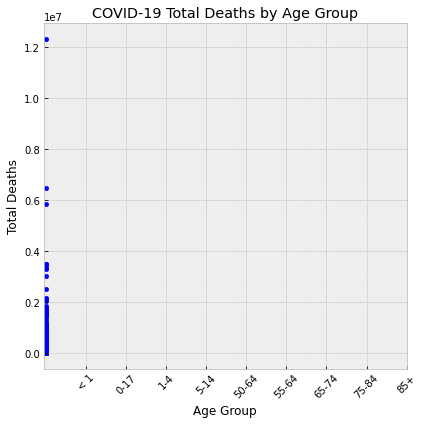

In [15]:
#Analyze the data by Age Group and Total Deaths

# Convert age groups to ordered categories
age_order = ["< 1", "0-17","1-4", "5-14", "50-64", "55-64","65-74", "75-84", "85+"]
Deaths_df['Age Group'] = pd.Categorical(Deaths_df['Age Group'], categories=age_order, ordered=True)
Deaths_df['Age Code'] = Deaths_df['Age Group'].cat.codes

# Scatter plot with numerical x-axis
Deaths_df.plot(kind='scatter', x='Age Code', y='Total Deaths', figsize=(6,6))
plt.xticks(ticks=range(len(age_order)), labels=age_order, rotation=45)
plt.xlabel('Age Group')
plt.title('COVID-19 Total Deaths by Age Group')
plt.tight_layout()
plt.show()

 

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style

matplotlib.style.use("bmh")

In [ ]:
Death_df = Deaths_df.groupby("Age Group").sum()
ax = Deaths_df.plot(kind = "bar", figsize = (18,8),y = ["Total Deaths", "COVID-19 Deaths"])

plt.xlabel("Age category")
plt.ylabel("Number of deaths")
plt.xticks(rotation = 45)
plt.title("Total deaths vs COVID-19 deaths for USA : 4 age categories")

ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

In [ ]:
# Correlation Analysis
corr_df= Deaths_df.corr()
corr_df

fig=plt.figure(figsize=(8,8))
plt.matshow(corr_df, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr_df.columns)),corr_df.columns, rotation='vertical');
plt.yticks(range(len(corr_df.columns)),corr_df.columns);

In [ ]:
# Which state has the largest deaths  in United States

df=Deaths_df[Deaths_df['State'] !='United States']

df.loc[df['COVID-19 Deaths'].idxmax()]

df.loc[df['Total Deaths'].idxmax()]

df.loc[df['Pneumonia Deaths'].idxmax()]

df.loc[df['Pneumonia and COVID-19 Deaths'].idxmax()]

df.loc[df['Pneumonia and COVID-19 Deaths'].idxmax()]

df.loc[df['Influenza Deaths'].idxmax()]

df.loc[df['Pneumonia, Influenza, or COVID-19 Deaths'].idxmax()]



In [ ]:
# Analyze on the Percentage of COVID Deaths compared to Total Deaths

Deaths_df['Percentage_Deaths'] = Deaths_df['COVID-19 Deaths'] / Deaths_df['Total Deaths']

Deaths_df['Percentage_Deaths'].head()

In [ ]:
#Density plot Analysis
Deaths_df['Percentage_Deaths'].plot(kind='density', figsize=(14,6))

In [ ]:
#Histogram Analysis
Deaths_df['Percentage_Deaths'].plot(kind='hist', figsize=(14,6))

# Conclusion
Overall the State of California has the largest death data compared to other States.Also, the higher the age the mortality rate is high with COVID-19 Total Deaths which is useful information for Public Health Agency, vaccination and other interventions that are needed.